In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(cowplot))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(harmony))
suppressMessages(library(ArchR))
suppressMessages(library(viridis))

In [2]:
in_dir <- "../../results/10_stereo_seq/05_anndata_to_seurat"
out_dir <- "../../results/10_stereo_seq/08_viz_cell_type_in_spatial"

if(!dir.exists(out_dir)){
    dir.create(out_dir)
}

In [3]:
cols <- c("B cells" = "#1f77b4",
          "Endothelial" = "#ff7f0e",
          "Fibroblasts" = "#279e68",
          "Keratinocytes" = "#d62728",
          "Langerhans cells" = "#aa40fc",
          "Macrophages" = "#8c564b",
          "Mast cells" = "#e377c2",
          "Melanocytes" = "#b5bd61",
          "Monocytes" = "#17becf",
          "NK cells" = "#aec7e8",
          "Neural" = "#ffbb78",
          "Pericytes" = "#98df8a",
          "Plasma cells" = "#ff9896",
          "Secretory cells" = "#c5b0d5",
          "Smooth Muscle" = "#c49c94",
          "T cells" = "#f7b6d2",
          "cDC" = "#dbdb8d",
          "pDC" = "#9edae5")

In [4]:
for(sample_name in c("HC01", "HL05", "HL25", "HL35")){
    obj <- readRDS(glue::glue("{in_dir}/{sample_name}.rds"))
    
    df <- read.csv("../../results/10_stereo_seq/07_integrate_with_scrna/spatial.csv", 
                   row.names = 1)
    df <- subset(df, sample == sample_name)
    df <- df[colnames(obj), ]
    obj@meta.data$cell_type <- df$cell_type
    
    Idents(obj) <- "cell_type"
    
    saveRDS(obj, glue::glue("{out_dir}/{sample_name}.rds"))
}

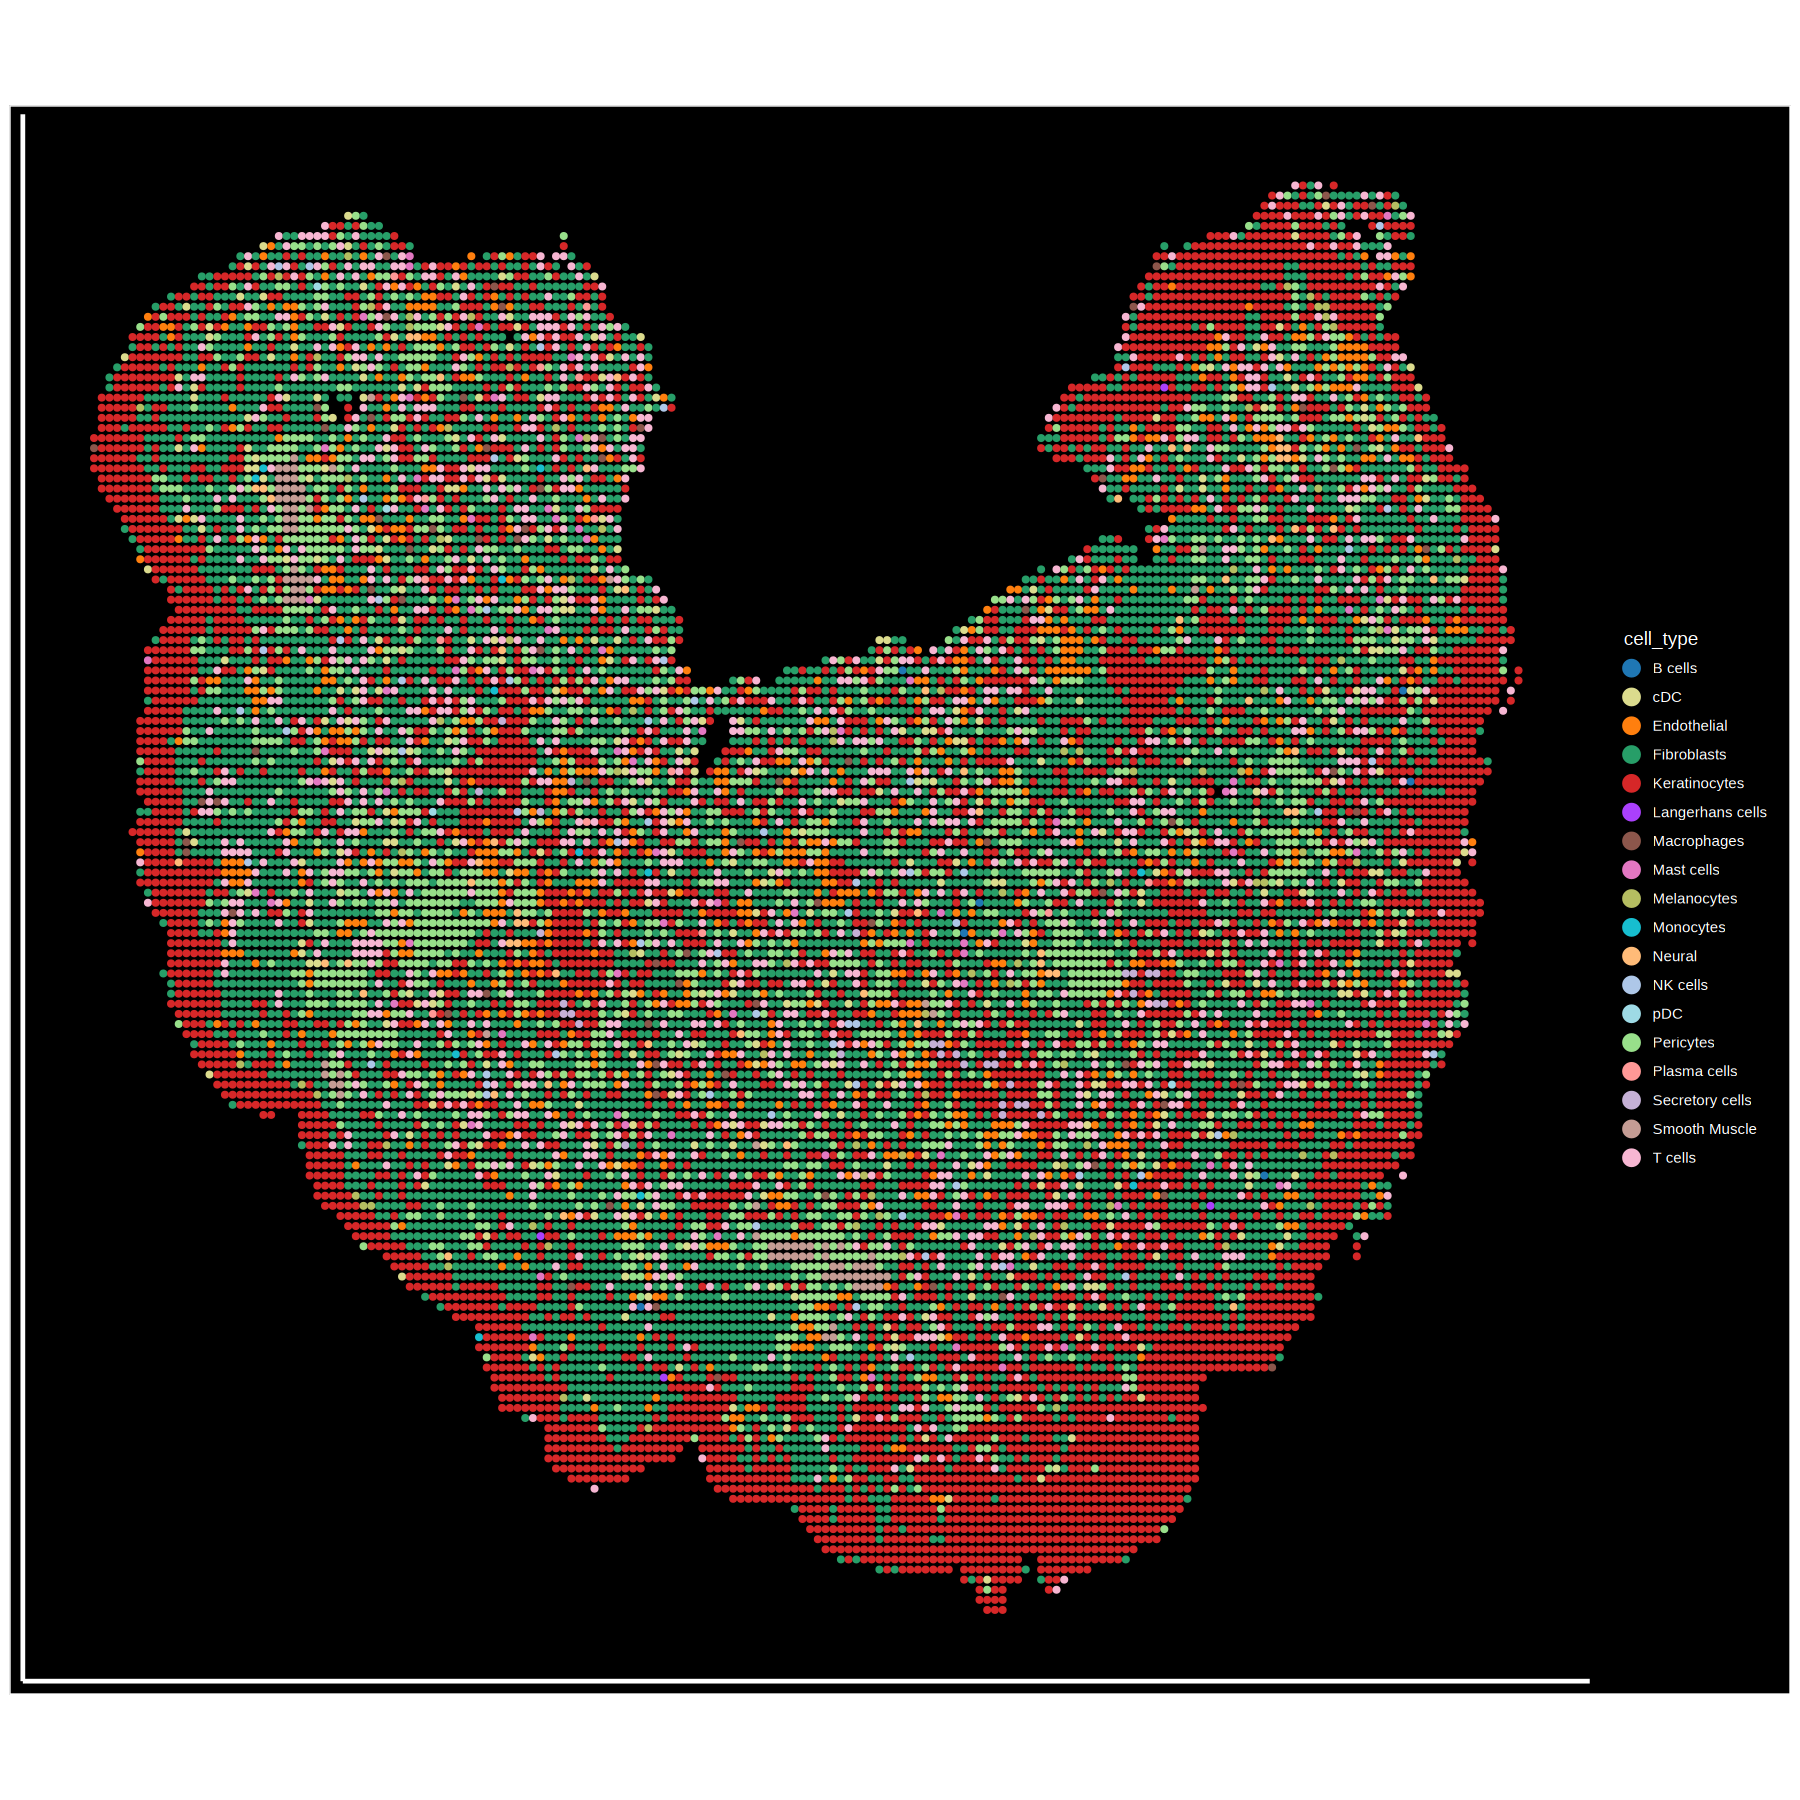

In [5]:
## HC01
obj <- readRDS(glue::glue("{out_dir}/HC01.rds"))

options(repr.plot.height = 15, repr.plot.width = 15)

SpatialDimPlot(obj, group.by = "cell_type", stroke = 0, cols = cols, 
               pt.size.factor = 1.2) +
    guides(fill = guide_legend(override.aes = list(size = 5))) +
    theme(axis.line.x = element_blank()) +
    DarkTheme()

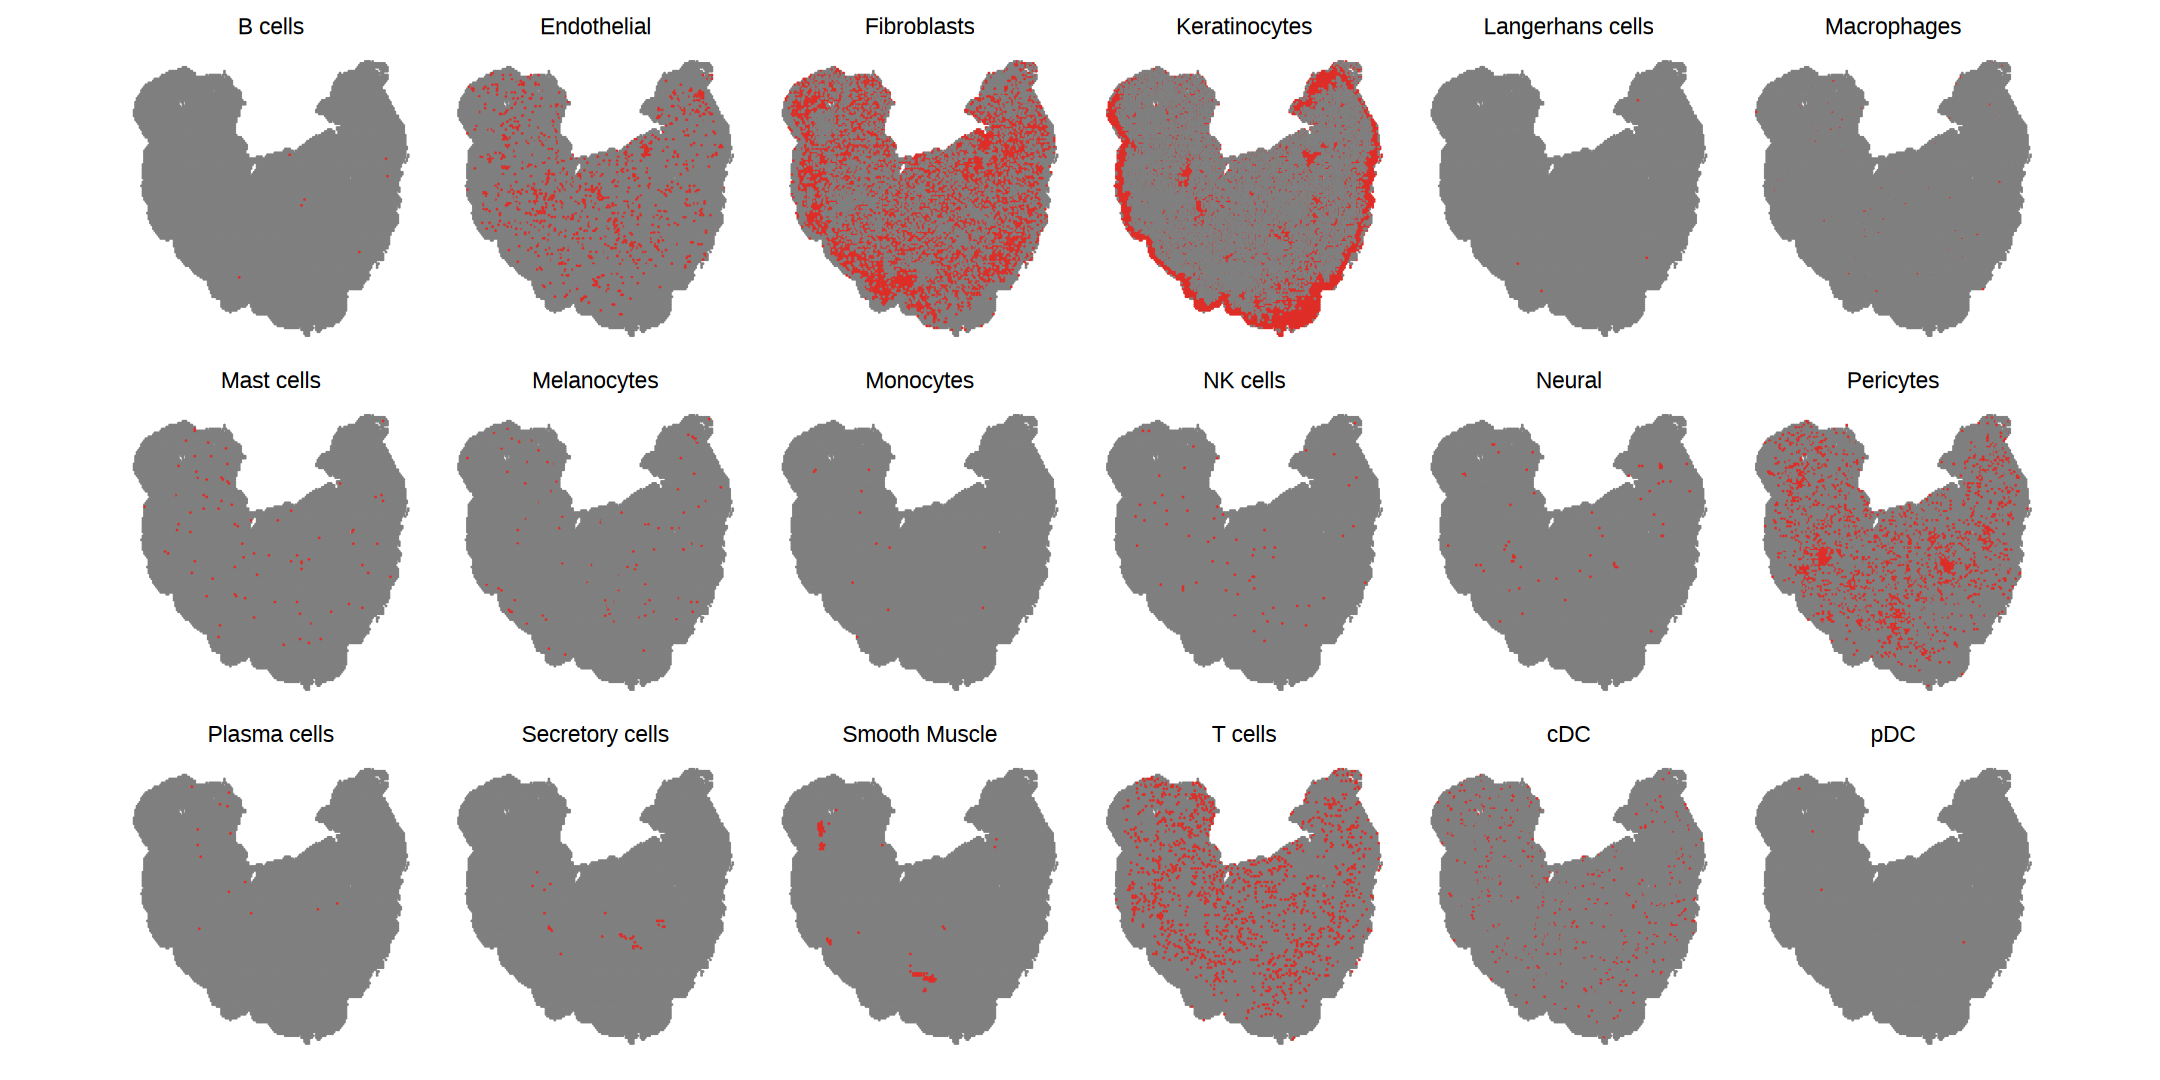

In [6]:
options(repr.plot.height = 9, repr.plot.width = 18)

SpatialDimPlot(obj, cells.highlight = CellsByIdentities(object = obj, idents = names(cols)), 
               facet.highlight = TRUE, ncol = 6)

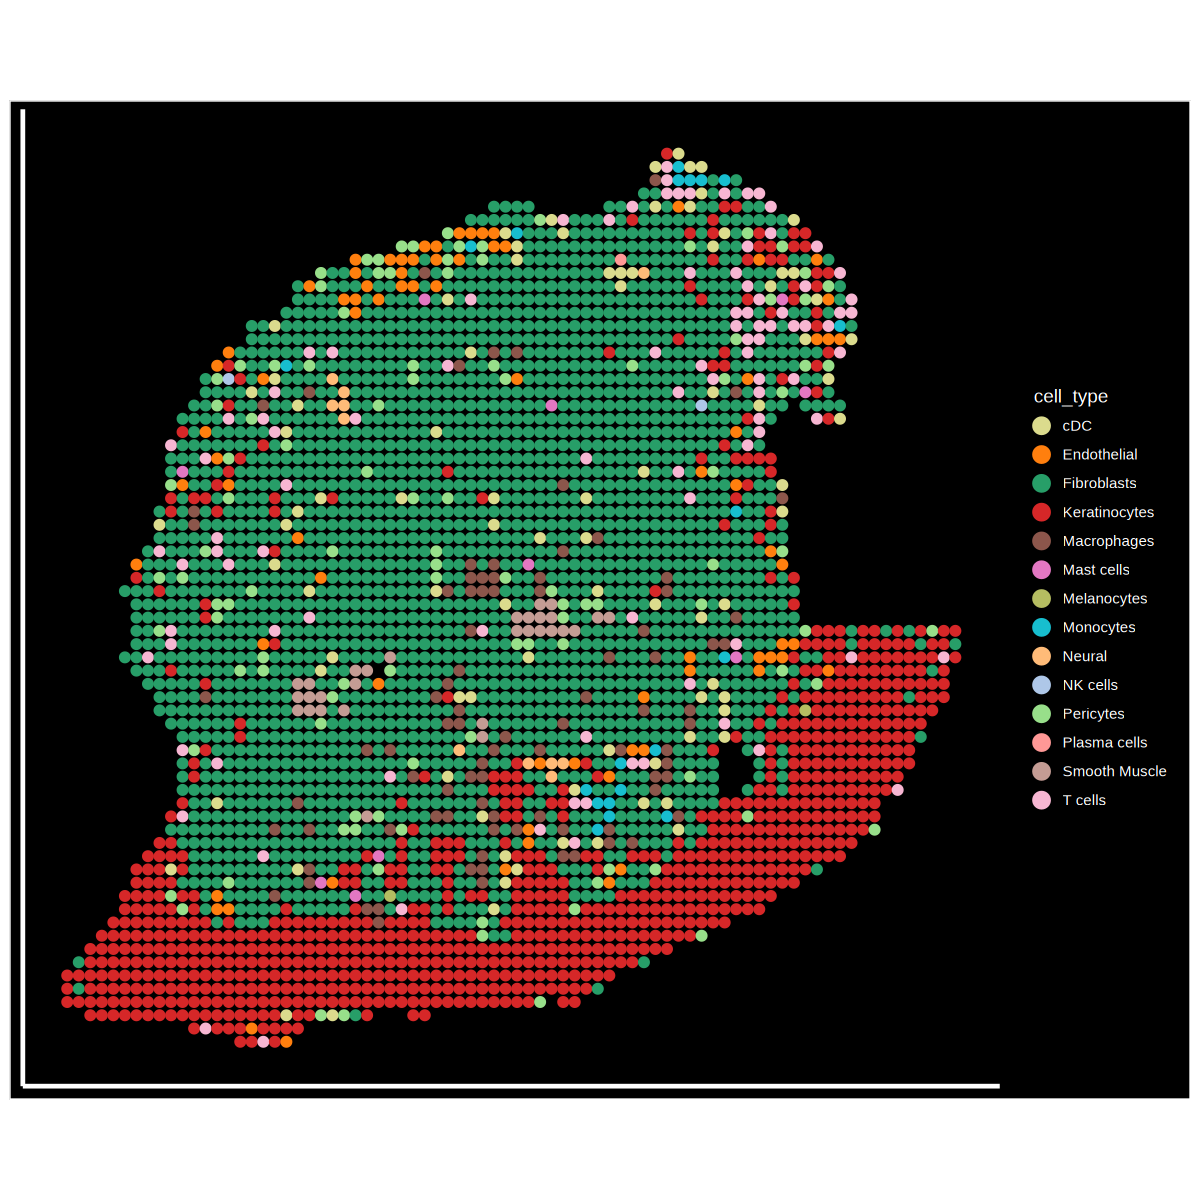

In [7]:
obj <- readRDS(glue::glue("{out_dir}/HL05.rds"))

options(repr.plot.height = 10, repr.plot.width = 10)

SpatialDimPlot(obj, group.by = "cell_type", stroke = 0, cols = cols, 
               pt.size.factor = 3) +
    guides(fill = guide_legend(override.aes = list(size = 5))) +
    DarkTheme()

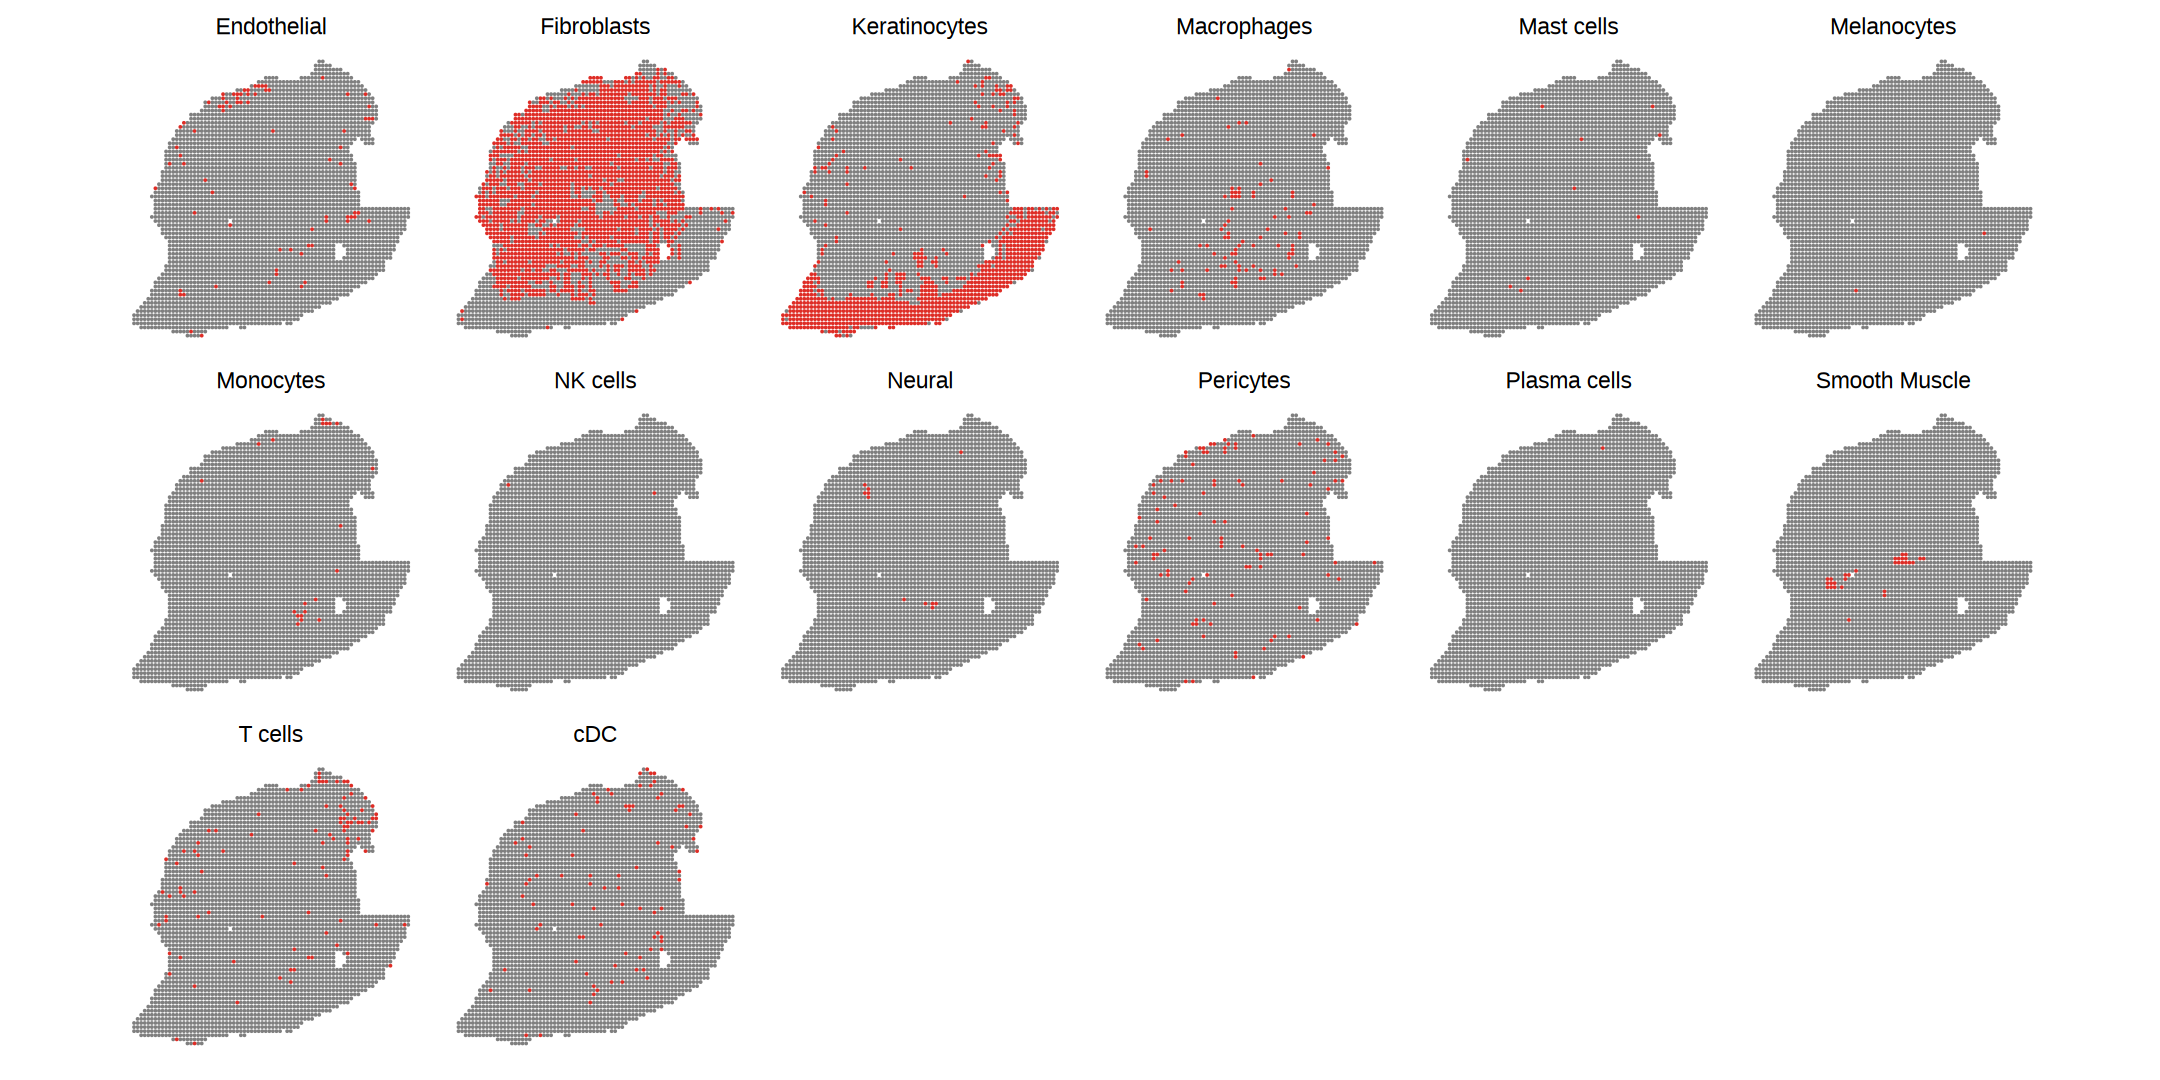

In [8]:
options(repr.plot.height = 9, repr.plot.width = 18)

SpatialDimPlot(obj, cells.highlight = CellsByIdentities(object = obj, idents = names(cols)), 
               facet.highlight = TRUE, ncol = 6, pt.size.factor = 2.5)

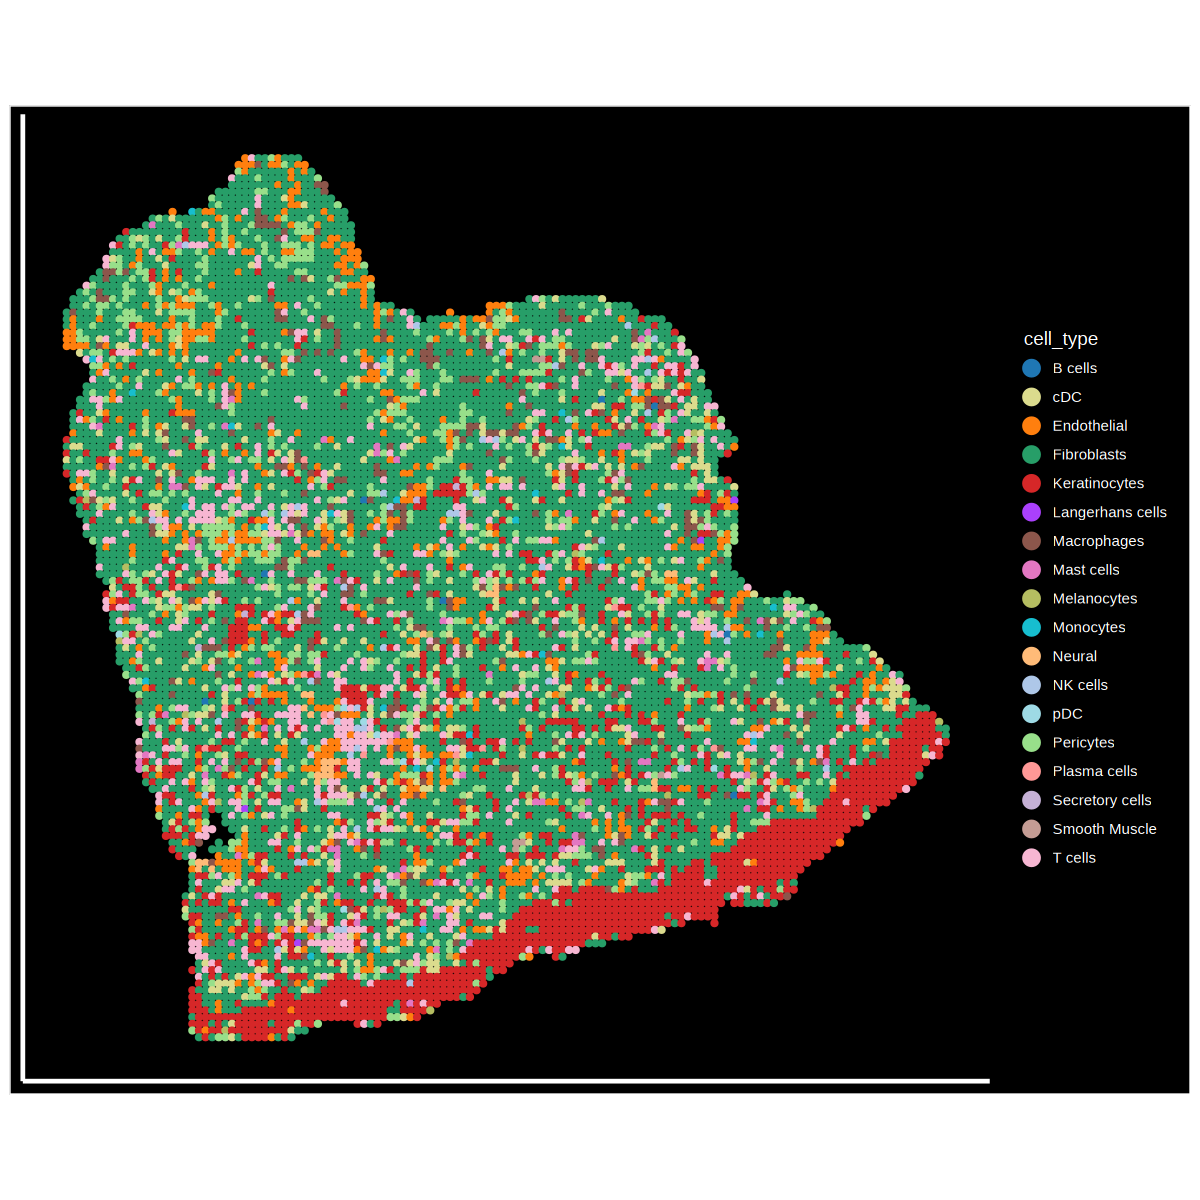

In [9]:
obj <- readRDS(glue::glue("{out_dir}/HL25.rds"))

options(repr.plot.height = 10, repr.plot.width = 10)

SpatialDimPlot(obj, group.by = "cell_type", stroke = 0, cols = cols, shape=21, 
               pt.size.factor = 2) +
    guides(fill = guide_legend(override.aes = list(size = 5))) +
    DarkTheme()

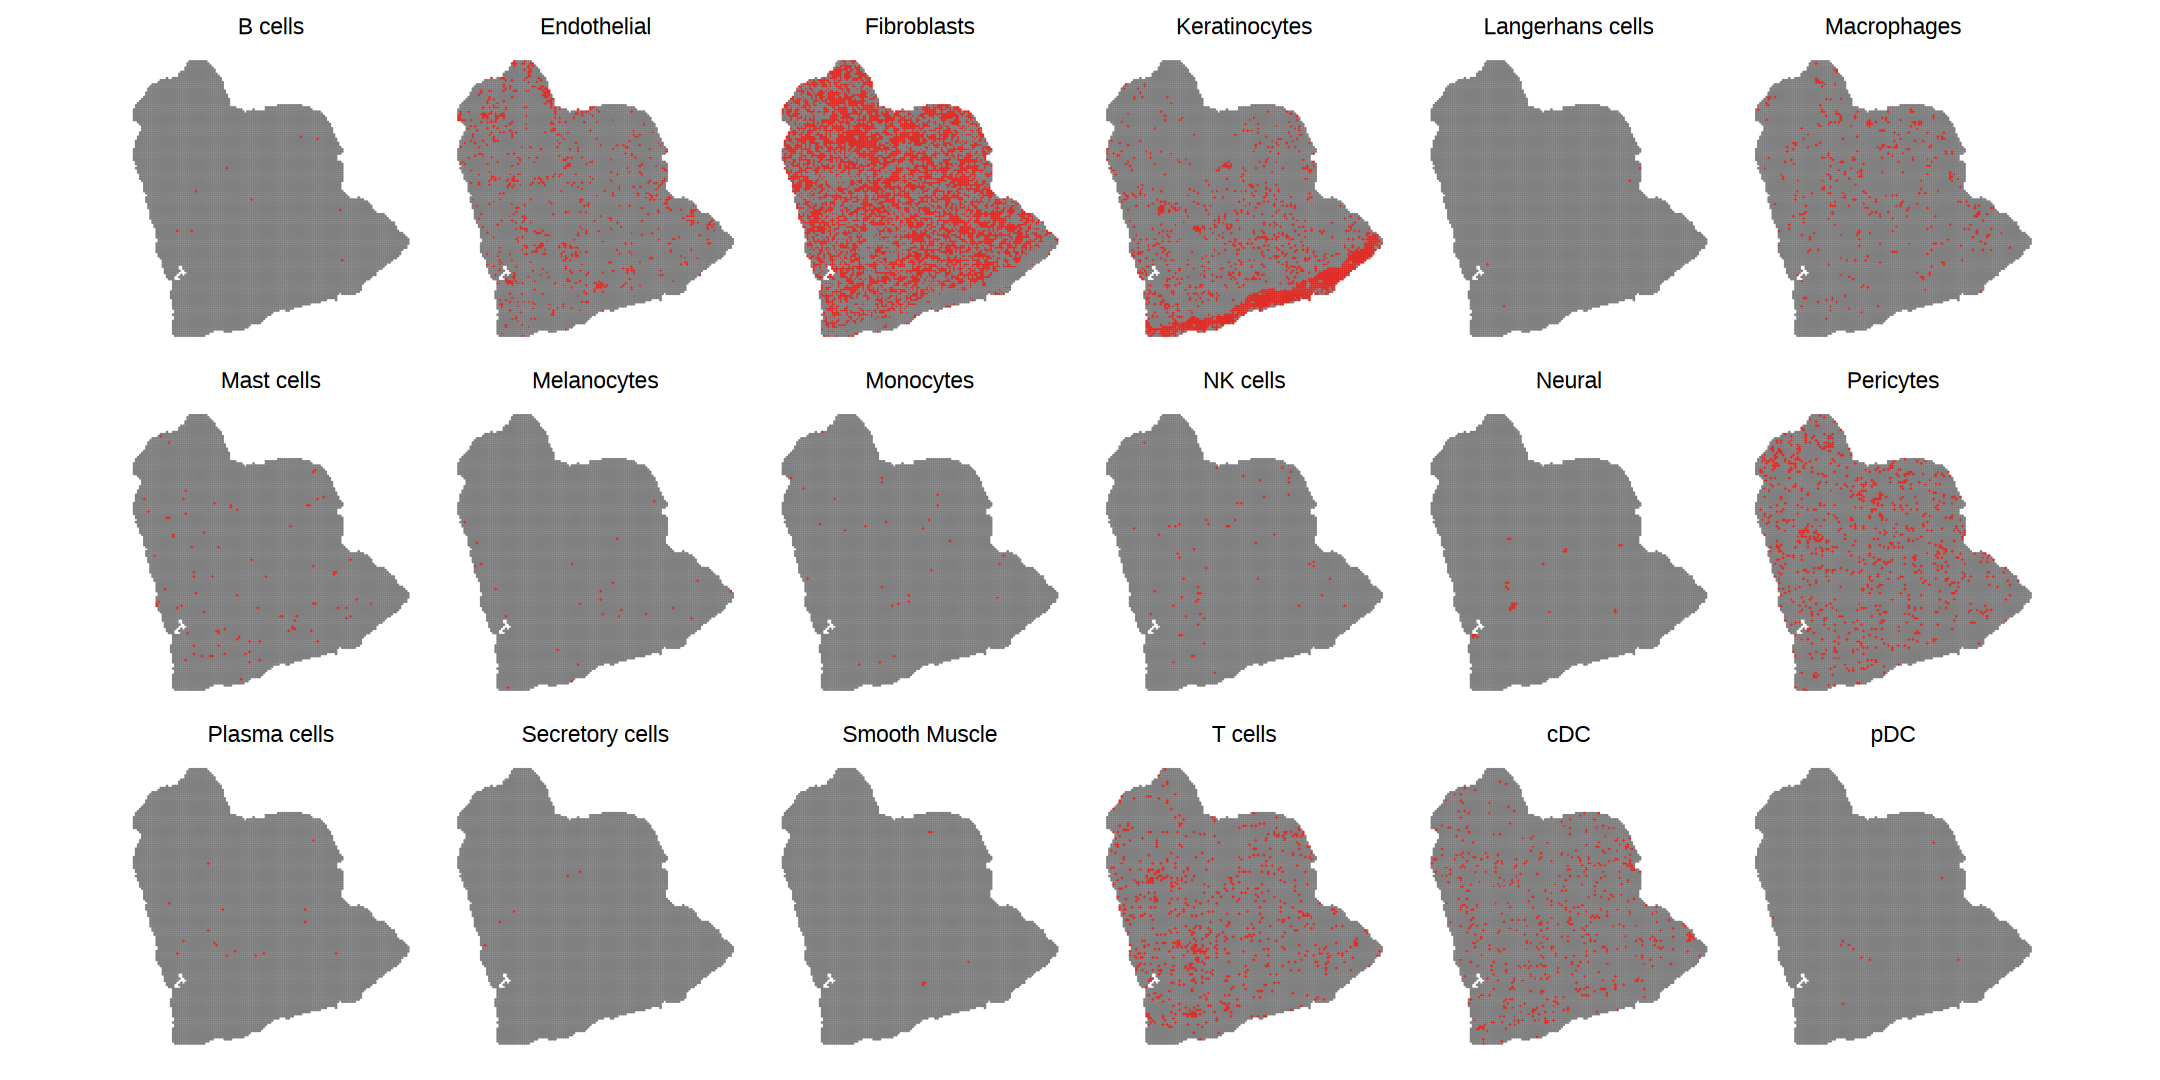

In [10]:
options(repr.plot.height = 9, repr.plot.width = 18)

SpatialDimPlot(obj, cells.highlight = CellsByIdentities(object = obj, idents = names(cols)), 
               facet.highlight = TRUE, ncol = 6)

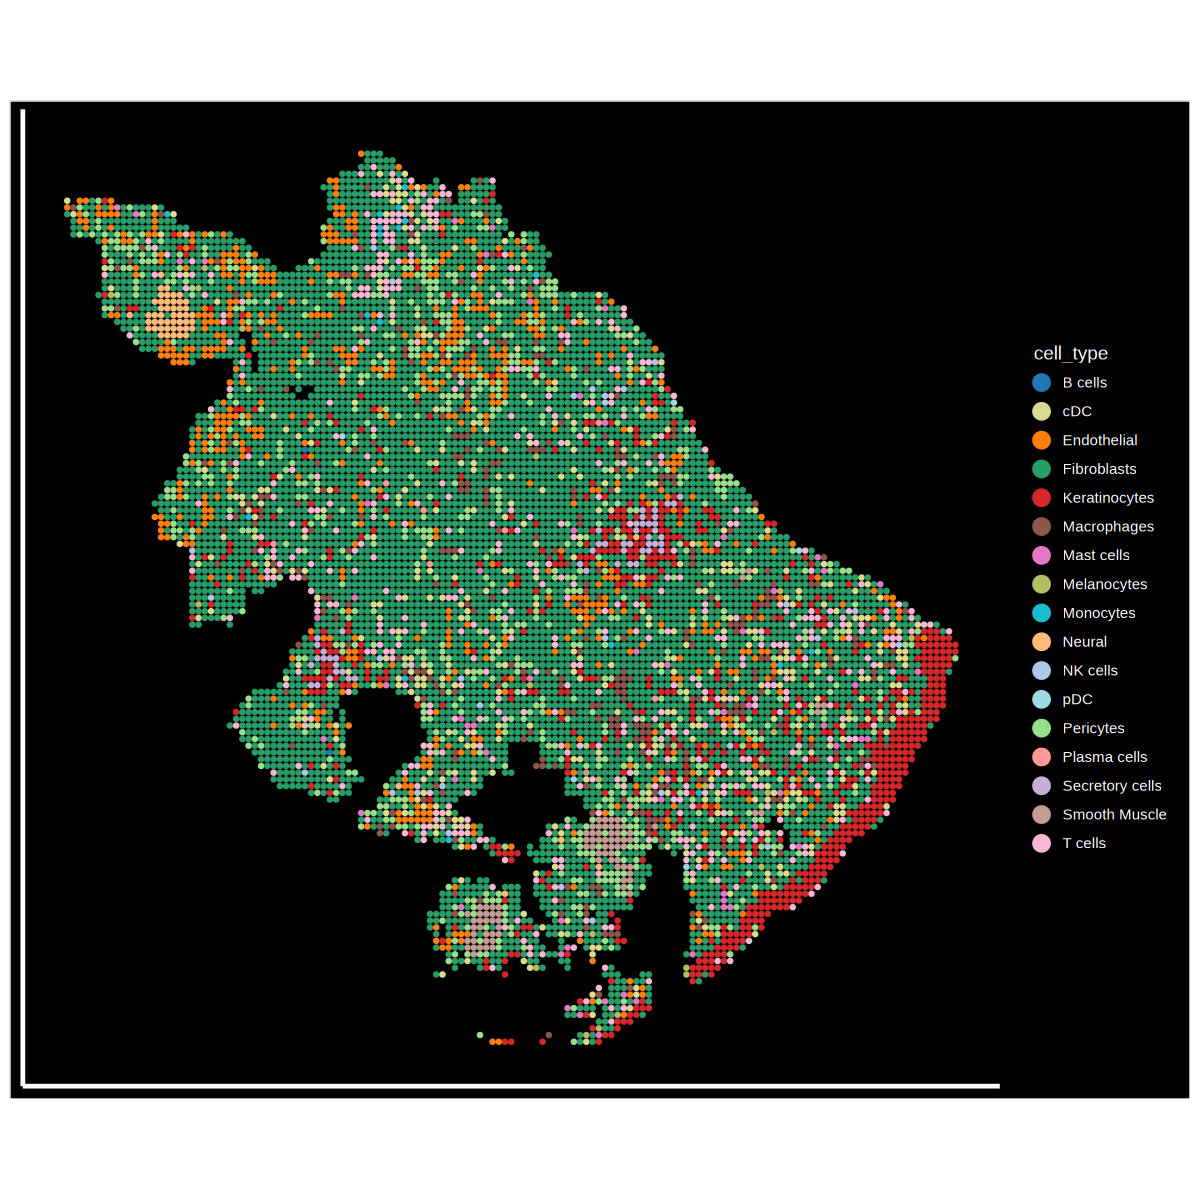

In [11]:
obj <- readRDS(glue::glue("{out_dir}/HL35.rds"))

options(repr.plot.height = 10, repr.plot.width = 10)

SpatialDimPlot(obj, group.by = "cell_type", stroke = 0, cols = cols, shape=21, 
               pt.size.factor = 1.5) +
    guides(fill = guide_legend(override.aes = list(size = 5))) +
    DarkTheme()

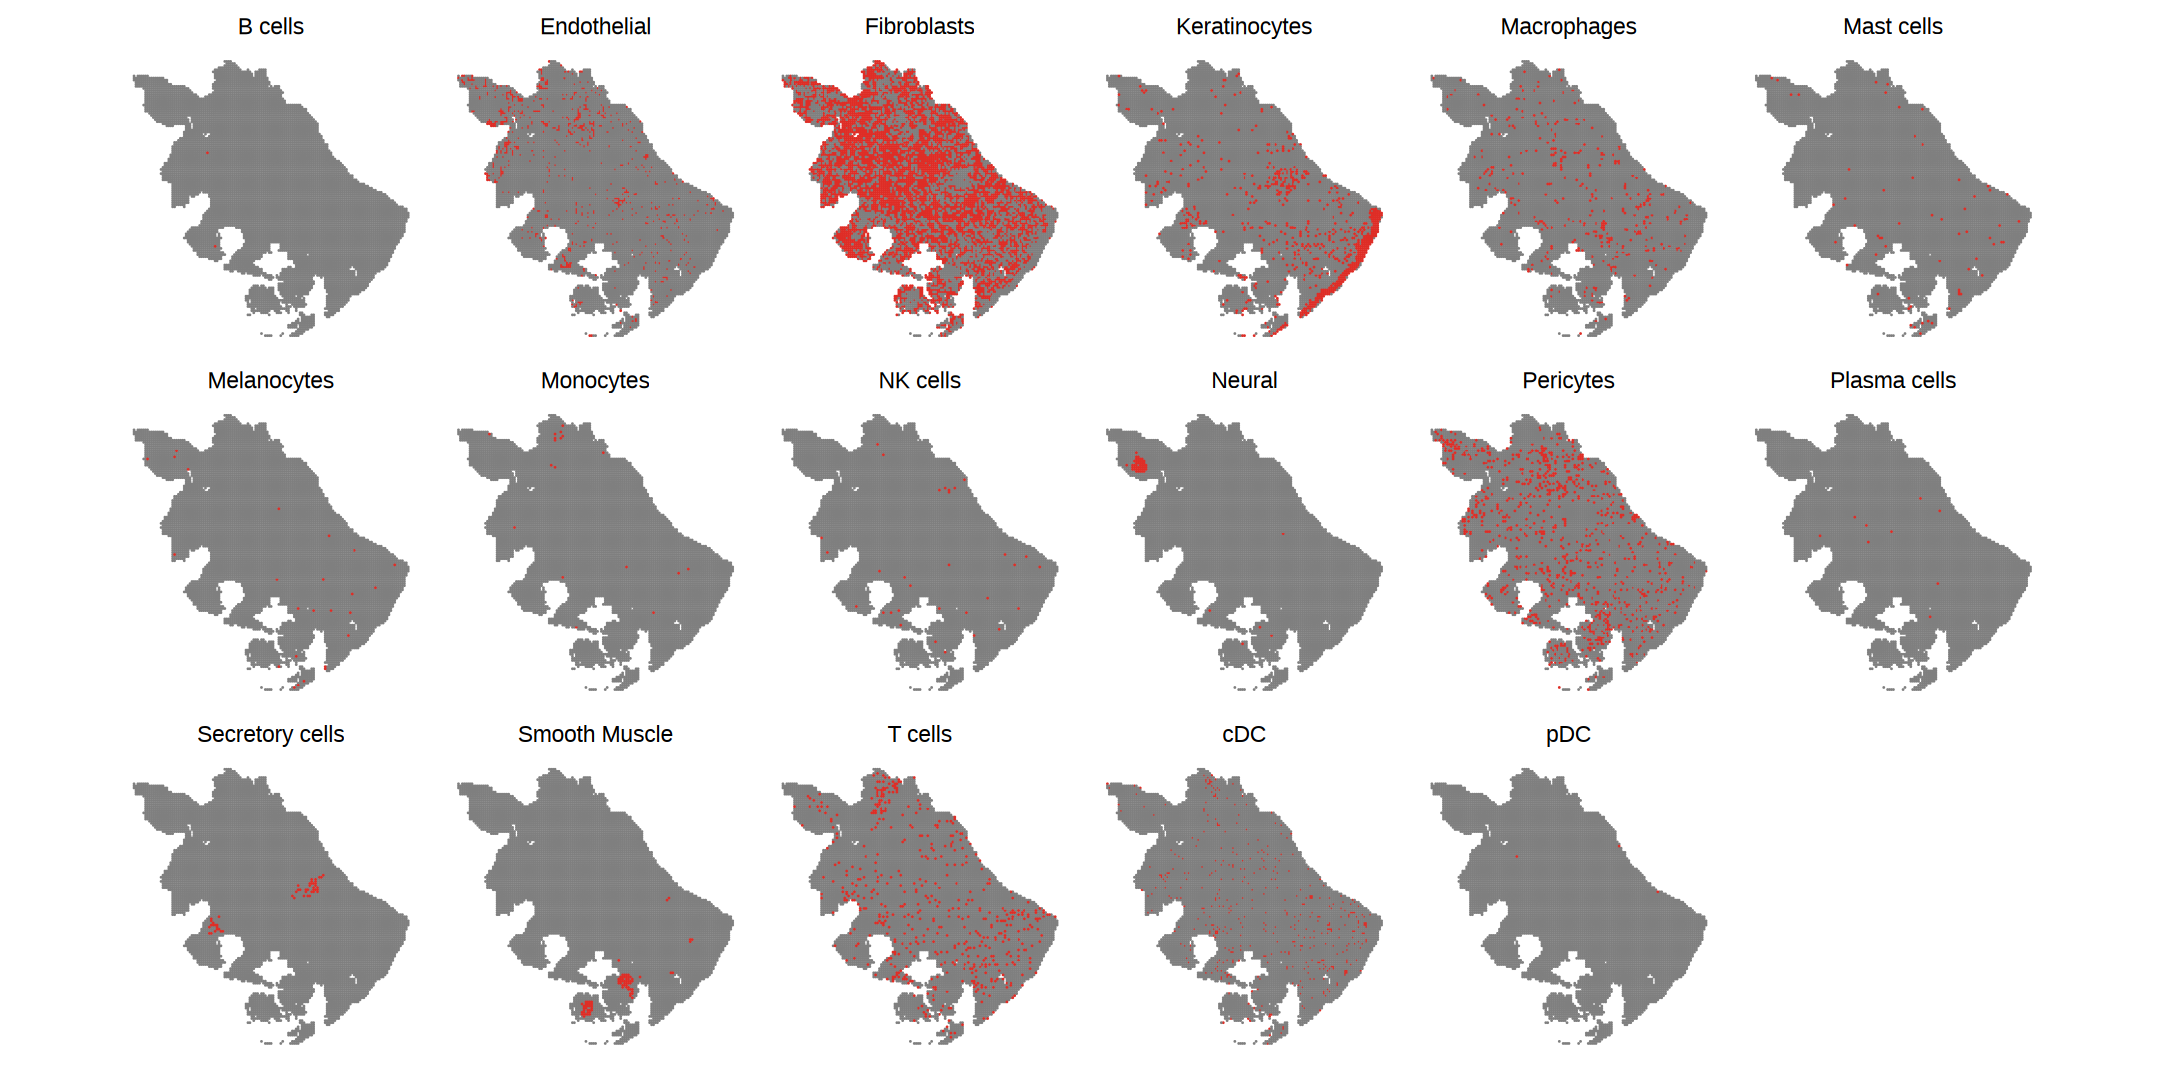

In [12]:
options(repr.plot.height = 9, repr.plot.width = 18)

SpatialDimPlot(obj, cells.highlight = CellsByIdentities(object = obj, idents = names(cols)), 
               facet.highlight = TRUE, ncol = 6)